# Diagnosing MAGICC's TCR, ECS and TCRE

In [1]:
# NBVAL_IGNORE_OUTPUT
from datetime import datetime

from pymagicc.core import MAGICC6, MAGICC7

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use("ggplot")

## Basic usage

The simplest option is to simply call the `diagnose_tcr_ecs_tcre` method of the MAGICC instance and read out the results. 

In [3]:
with MAGICC6() as magicc:
    # you can tweak whatever parameters you want in
    # MAGICC6/run/MAGCFG_DEFAULTALL.CFG, here's a few
    # examples that might be of interest
    results = magicc.diagnose_tcr_ecs_tcre(
        CORE_CLIMATESENSITIVITY=2.75,
        CORE_DELQ2XCO2=3.65,
        CORE_HEATXCHANGE_LANDOCEAN=1.5,
    )
print(
    "TCR is {tcr:.4f}, ECS is {ecs:.4f} and TCRE is {tcre:.6f}".format(
        **results
    )
)

TCR is 1.8517 kelvin, ECS is 2.7376 kelvin and TCRE is 0.002146 kelvin / C / gigametric_ton


If we wish, we can alter the MAGICC instance's parameters before calling the `diagnose_tcr_ecs` method. 

In [4]:
with MAGICC6() as magicc:
    results_default = magicc.diagnose_tcr_ecs_tcre()
    results_low_ecs = magicc.diagnose_tcr_ecs_tcre(CORE_CLIMATESENSITIVITY=1.5)
    results_high_ecs = magicc.diagnose_tcr_ecs_tcre(
        CORE_CLIMATESENSITIVITY=4.5
    )

print(
    "Default TCR is {tcr:.4f}, ECS is {ecs:.4f} and TCRE is {tcre:.6f}".format(
        **results_default
    )
)
print(
    "Low TCR is {tcr:.4f}, ECS is {ecs:.4f} and TCRE is {tcre:.6f}".format(
        **results_low_ecs
    )
)
print(
    "High TCR is {tcr:.4f}, ECS is {ecs:.4f} and TCRE is {tcre:.6f}".format(
        **results_high_ecs
    )
)

Default TCR is 1.9734 kelvin, ECS is 2.9833 kelvin and TCRE is 0.002287 kelvin / C / gigametric_ton
Low TCR is 1.1942 kelvin, ECS is 1.4985 kelvin and TCRE is 0.001384 kelvin / C / gigametric_ton
High TCR is 2.5229 kelvin, ECS is 4.4203 kelvin and TCRE is 0.002924 kelvin / C / gigametric_ton


## Making a plot

The output also includes the timeseries that were used in the diagnosis experiment. Hence we can use the output to make a plot.

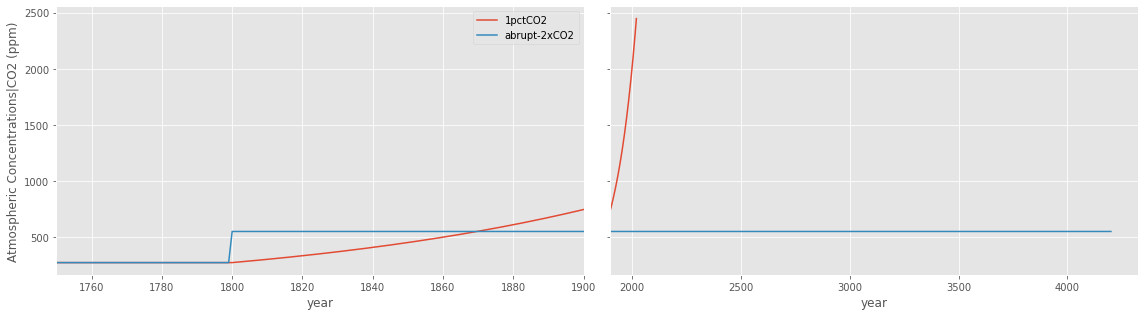

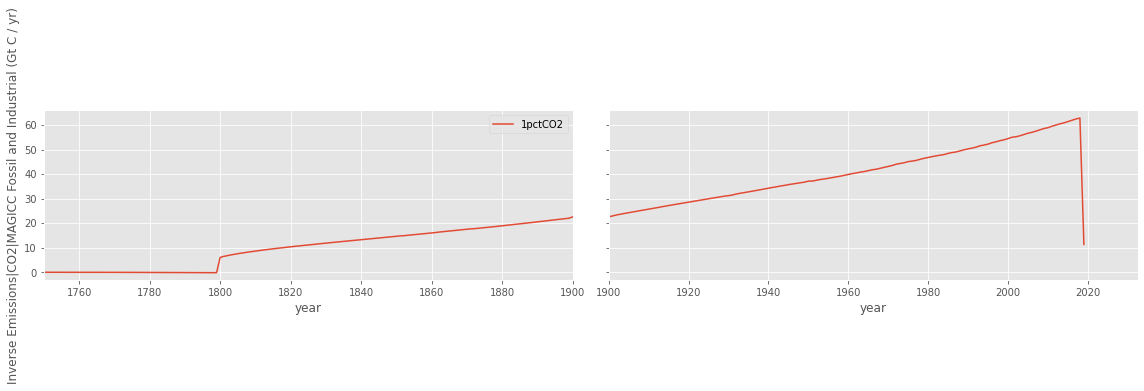

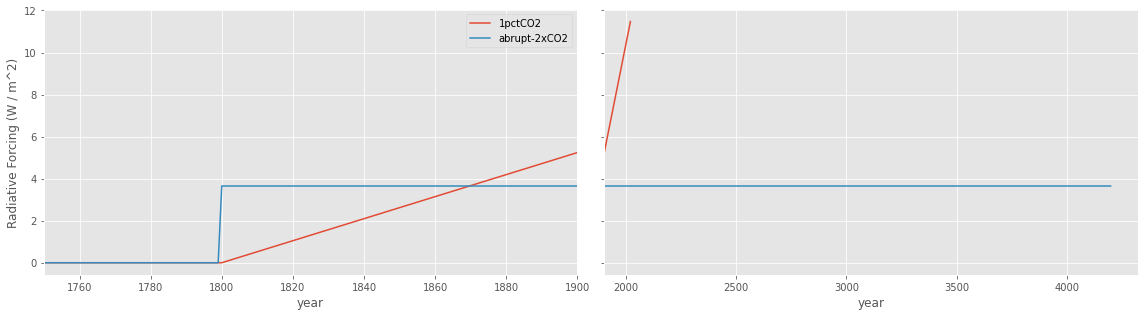

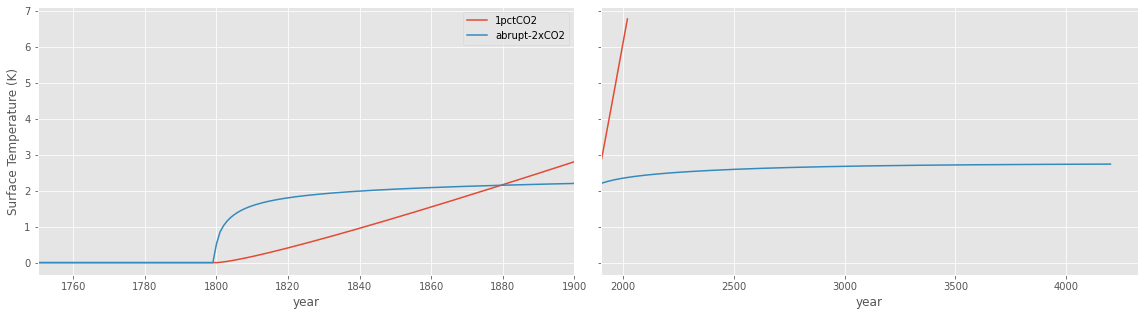

In [5]:
join_year = 1900

pdf = (
    results["timeseries"]
    .filter(region="World")
    .to_iamdataframe()
    .swap_time_for_year()
    .data
)
for variable, df in pdf.groupby("variable"):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 4.5))
    unit = df["unit"].unique()[0]

    for scenario, scdf in df.groupby("scenario"):
        scdf.plot(x="year", y="value", ax=axes[0], label=scenario)
        scdf.plot(x="year", y="value", ax=axes[1], label=scenario)

    axes[0].set_xlim([1750, join_year])
    axes[0].set_ylabel("{} ({})".format(variable, unit))

    axes[1].set_xlim(left=join_year)
    axes[1].legend_.remove()

    fig.tight_layout()

In [6]:
# NBVAL_IGNORE_OUTPUT
results["timeseries"].filter(
    scenario="abrupt-2xCO2", region="World", year=range(1795, 1905)
).timeseries()

time                                                                                       1795-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A        0.000   
                                Radiative Forcing              W / m^2 MAGICC6       N/A        0.000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A      276.744   

time                                                                                       1796-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A        0.000   
                                Radiative Forcing              W / m^2 MAGICC6       N/A        0.000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A      276.744   

time                                                                                       1797-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A        0.000   
                                Radiative Forcing              W / m^2 MAGICC6       N/A        0.000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A      276.744   

time                                                                                       1798-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A        0.000   
                                Radiative Forcing              W / m^2 MAGICC6       N/A        0.000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A      276.744   

time                                                                                       1799-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A        0.000   
                                Radiative Forcing              W / m^2 MAGICC6       N/A        0.000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A      276.744   

time                                                                                       1800-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A       0.5139   
                                Radiative Forcing              W / m^2 MAGICC6       N/A       3.6500   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A     553.4880   

time                                                                                       1801-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A     0.846851   
                                Radiative Forcing              W / m^2 MAGICC6       N/A     3.650000   
                                Atmospheric Concentrations|CO2 ppm     MAGICC6       N/A   553.488000   

time                                                                                       1802-01-01  \
model       scenario     region variable                       unit    climate_model todo               
unspecified abrupt-2xCO2 World  Surface Temperature            K       MAGICC6       N/A     1.028787   
   